## Supermarket Store Branches’ Sales Analysis

- Analyzing Stores sales and their dependence on stores area and daily customer count

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import and read file
df = pd.read_csv("Stores.csv") # pd.read_excel()
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


## Data Inspection

In [3]:
# shape of data
df.shape

(896, 5)

There are 896 rows and 5 columns in the dataset

In [4]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


All data is captured as Quantitative variables. We will need to change the Store ID to Categorical

In [5]:
# check columns
df.columns.tolist()

['Store ID ',
 'Store_Area',
 'Items_Available',
 'Daily_Customer_Count',
 'Store_Sales']

We see a space in the 'Store ID' column name. We will resolve this by changing the space to an underscore. There's also a trailing space at the end of the column. This will have to be removed

In [6]:
# checking for missing values
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

No missing data in the dataset

In [7]:
#check for any negative values in the dataset. #True means there are negatives in one or more columns, False means there are none
(df < 0).any().any()

False

No negative values in the dataset

## Data Preprocessing/Wrangling

- We will remove the trailing space in the `Store ID` column 
- We will rename the `Store ID` column  to `Store_ID` 
- We will convert the `Store ID`  data type to categorical

In [11]:
#Remove trailing spaces in column names
df.columns = df.columns.str.strip()

Index(['Store_ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [9]:
#then replace spaces in all column names with underscore
df.columns =[col.replace(' ','_') for col in df.columns]

In [10]:
df.columns.tolist()

['Store_ID',
 'Store_Area',
 'Items_Available',
 'Daily_Customer_Count',
 'Store_Sales']

In [11]:
#Convert Store_ID to Object data type
df.Store_ID = df.Store_ID.astype('object')

In [12]:
# check the columns that are categorical
cat_cols = df.select_dtypes(include = ['category', 'object']).columns.tolist()
cat_cols

['Store_ID']

In [13]:
# check the columns that are numerical
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
num_cols

['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']

In [14]:
# confirm data types
df.dtypes

Store_ID                object
Store_Area               int64
Items_Available          int64
Daily_Customer_Count     int64
Store_Sales              int64
dtype: object

In [15]:
# Let's confirm if Each store entry is unique 
df['Store_ID'].nunique()

896

Each row represents a unique store

#### Data wrangling/preprocessing completed

## Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

#### Univariate Analysis
- you are considering the distribution of a variable or feature and its visualization

In [16]:
# statistical summary of the data
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


The total number of records for each variable is 896. The mean value for `Store_Area`, `Items_Available`, `Daily_Customer_Count` and `Store_Sales` is 1485.4 square yards, 1782 items, 786 daily customers and 59351 USD respectively. The maximum Daily Customer Count and Sales is 1560 customers and 116,320 USD respectively. On the flipside, the minimum Daily Customer Count and Sales is 10 people and 14920 USD respectively

In [17]:
df.columns

Index(['Store_ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

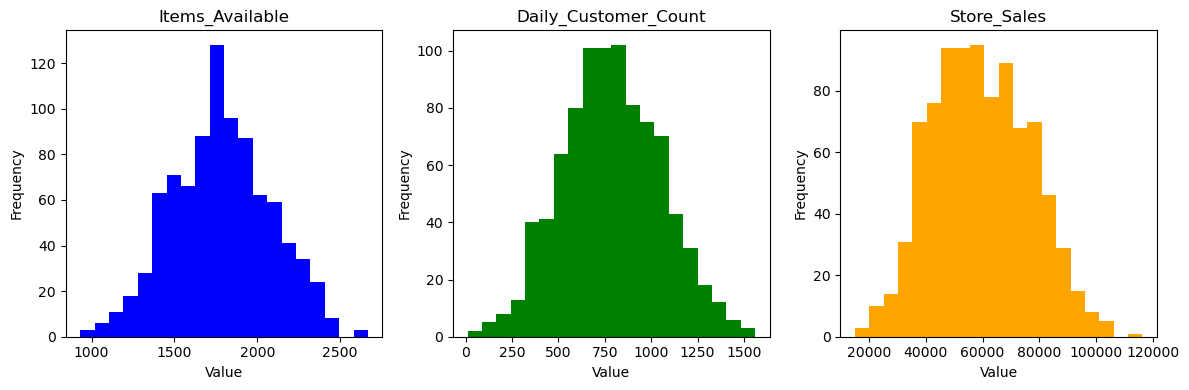

In [18]:
# distribution of numerical column
columns_to_visualize = ['Items_Available', 'Daily_Customer_Count', 'Store_Sales']

# Create a figure and axes object
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms for each numerical column
axs[0].hist(df['Items_Available'], bins=20, color='blue')
axs[0].set_title('Items_Available')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['Daily_Customer_Count'], bins=20, color='green')
axs[1].set_title('Daily_Customer_Count')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['Store_Sales'], bins=20, color='orange')
axs[2].set_title('Store_Sales')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')

# Adjust spacing between subplots if needed
plt.tight_layout()

# Display the chart
plt.show()


Numerical data shows a Normal distribution for customer count and store sales.

### Bivariate Analysis
- You are considering two features or variables and its visualization to understand the patterns, trends, and the measure of relationship between them.

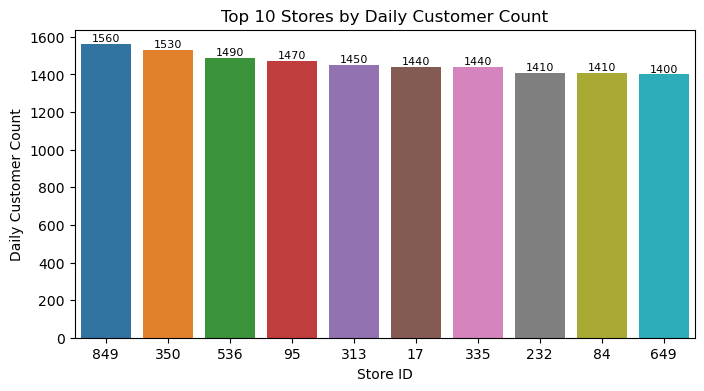

In [15]:
# Defining the plot size
plt.figure(figsize=(8, 4))
 
# Defining the values for x-axis, y-axis and from which dataframe the values are to be picked
plots = sns.barplot(x="Store_ID", y="Daily_Customer_Count", data=df , order=df.sort_values('Daily_Customer_Count',
                                                                                           ascending=False)[:10].Store_ID)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 4),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Store ID", size=10)
 
# Setting the label for y-axis
plt.ylabel("Daily Customer Count", size=10)
 
# Setting the title for the graph
plt.title("Top 10 Stores by Daily Customer Count")
 
# Finally showing the plot
plt.show()

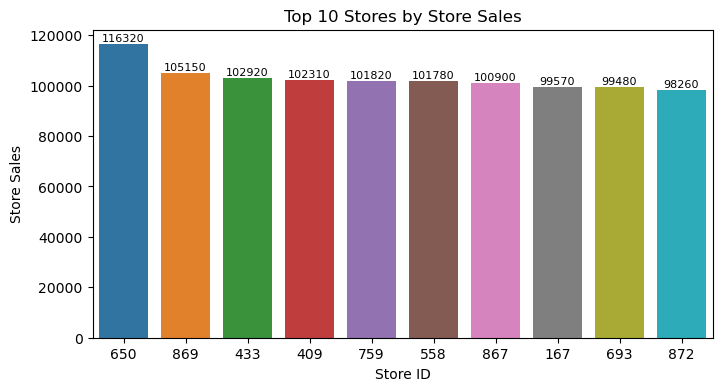

In [20]:
# Defining the plot size
plt.figure(figsize=(8, 4))
 
# Defining the values for x-axis, y-axis and from which dataframe the values are to be picked
plots = sns.barplot(x="Store_ID", y="Store_Sales", data=df , order=df.sort_values('Store_Sales', ascending=False)[:10].Store_ID)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 4),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Store ID", size=10)
 
# Setting the label for y-axis
plt.ylabel("Store Sales", size=10)
 
# Setting the title for the graph
plt.title("Top 10 Stores by Store Sales")
 
# Finally showing the plot
plt.show()

[Text(0.5, 1.0, 'Top 10 Stores with highest number of Available Items')]

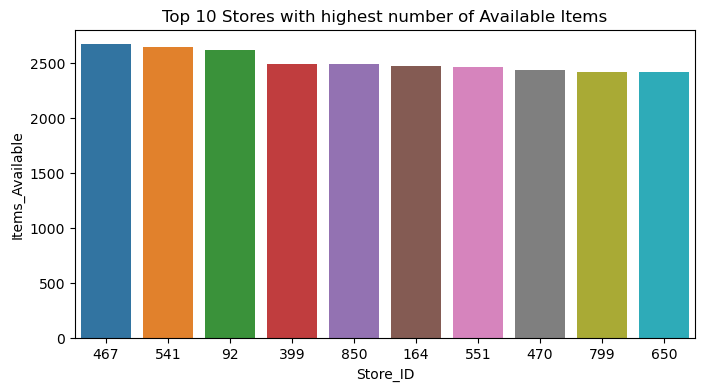

In [21]:
#make a plot to show top 10 Stores with the highest number of Items Available 
plt.figure(figsize = (8,4))

sns.barplot(data=df, x='Store_ID', y='Items_Available', order=df.sort_values('Items_Available', 
    ascending=False)[:10].Store_ID).set(title='Top 10 Stores with highest number of Available Items')

## Multivariate Analysis
- you are considering two or more features and its visualization to discover trends and patterns, and the measure of relationship between them.

#### Looking at the relationship between numerical variables using pair plots and correlation plots

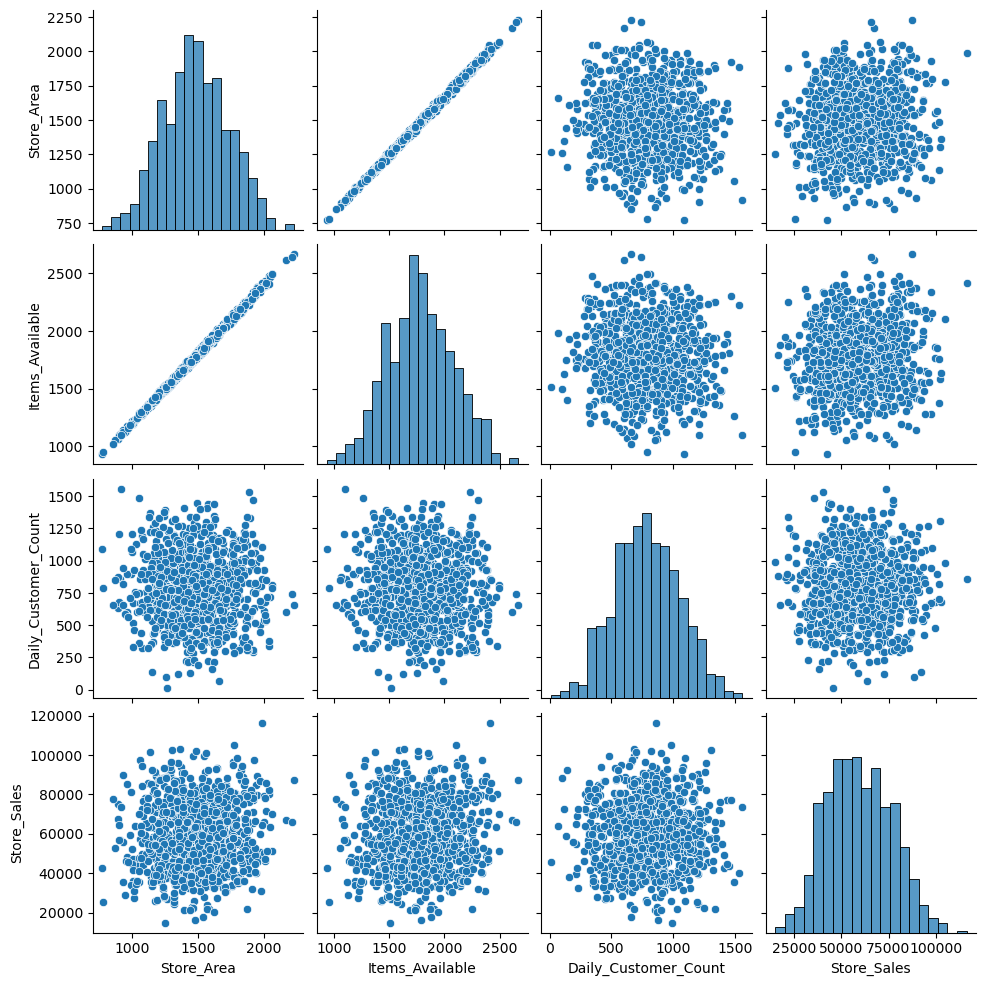

In [22]:
sns.pairplot(df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']])

In [23]:
# creating a 2-D Matrix with correlation plots for only numerical variables
correlation = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']].corr() 
correlation


,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


<Axes: >

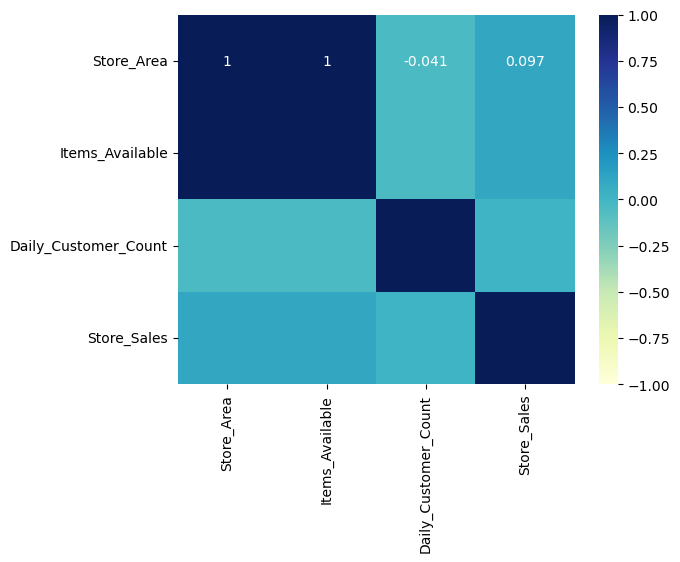

In [24]:
sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

Strong correlation between Store Area and Items Available, as you would expect, but very weak to no correlation between other variables

### Observation and Recommendation
1. With no correlation between store area and sales, or sales and the sheer number of items available, it might be more efficient to optimize Store real estate and not invest in expanding shop sizes. Bigger stores will not add value in profits, and will cost more in terms of staffing, climate control and cleaning. 

2. It is recommended to carry out further studies to identify the key products being purchased by customers. As it can be seen that there's no correlation between a large number of items available for sales and actual store sales, we can likely optimize significantly on shelf space by stocking mainly popular items. Smaller stores, stocking items in good demand could then ensure maximum profits. 